In [7]:
!pip install python-igraph
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install easygui
!pip install cairocffi

In [8]:
# Import of required libraries and packages
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
import scipy
import statistics
import pandas as pd
print(ig.__version__)

#Creating and empty Graph object
graph = ig.Graph()

0.9.0


In [9]:
# Load the data and create a network
# Data is in Pajek-format
air = ig.read('USAir97.net',format='pajek')
air.summary()

'IGRAPH UNW- 332 2126 -- \n+ attr: id (v), name (v), x (v), y (v), z (v), weight (e)'

In [12]:
# Calculate, plot and analyse centrality measures and network properties

degree = air.degree()
betw = air.betweenness()
apl = air.average_path_length()
cls = air.closeness
pgrnk = air.pagerank()
clcof = air.transitivity_undirected()


<function matplotlib.pyplot.plot>

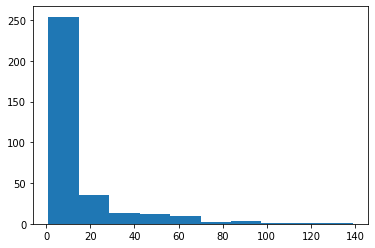

In [11]:
# Simple Histogram of degree distribution
plt.hist(degree, bins=10)
plt.plot

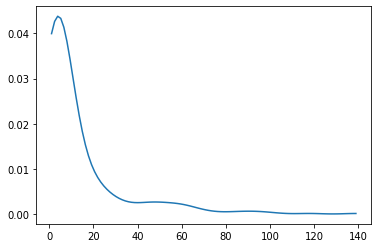

In [10]:
# More advanced plot of the degree distribtion by using the probability density
from scipy.stats.kde import gaussian_kde
from numpy import linspace

# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel 
kde = gaussian_kde(degree)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(degree), max(degree), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

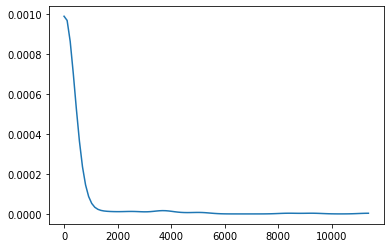

In [13]:
# More advanced plot of the betweenness distribtion by using the probability density
from scipy.stats.kde import gaussian_kde
from numpy import linspace

# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel 
kde = gaussian_kde(betw)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(betw), max(betw), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

In [25]:
# Calculation of Spearman Rank Correlations (variables are very skewed)
from scipy.stats import spearmanr
cor_db=spearmanr(degree, betw )[0]
cor_dp=spearmanr(degree, pgrnk )[0]
cor_bp=spearmanr(betw, pgrnk )[0]

print("Spearman correlation between degree and betweenness = {:.2f}".format(cor_db))
print("Spearman correlation between degree and page rank = {:.2f}".format(cor_dp))
print("Spearman correlation between betweenness and page rank = {:.2f}".format(cor_bp))

Spearman correlation between degree and betweenness = 0.86
Spearman correlation between degree and page rank = 0.93
Spearman correlation between betweenness and page rank = 0.86


In [28]:
# Create a subgraph of nodes with a degree at least equal to the average degree
avg_degree = np.mean (degree)
print(avg_degree)

# Convert list of node degree to an np.array 
# This allows the use of functions from numpy
np_degree = np.array(degree)

np_degree = np.where(np_degree<=avg_degree)
print("Number of nodes with degree equal to or greater than the average degree: % 2d" %(len(np_degree[0])))

#Create subgraph using IDs of nodes to be retained
red_air = air.subgraph(np_degree[0])
print("Number of nodes in subgraph: % 2d" %(len(red_air.vs())))

12.80722891566265
Number of nodes with degree equal to or greater than the average degree:  247
Number of nodes in subgraph:  247


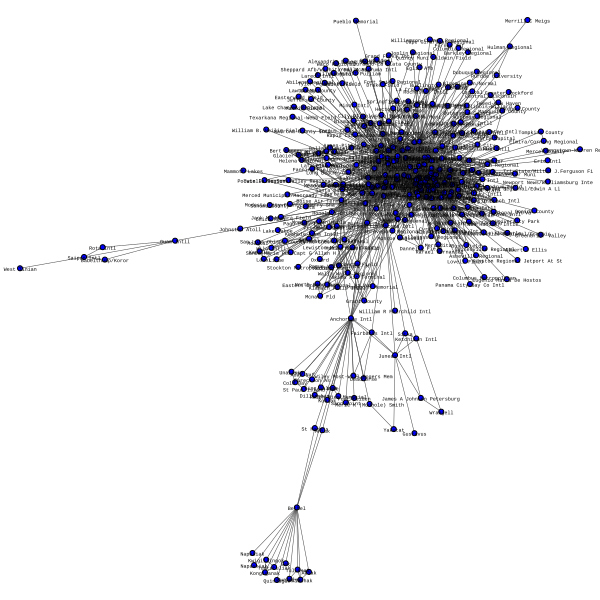

In [34]:

# Create plot using Fruchterman-Rheingold
layout_fr = air.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = air.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=0.5
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(air, **visual_style)

In [36]:
sp = air.get_shortest_paths(v='Sheppard Afb/Wichita Falls Mun', to='West Tinian')
sp

[[246, 260, 312, 328, 326, 331]]

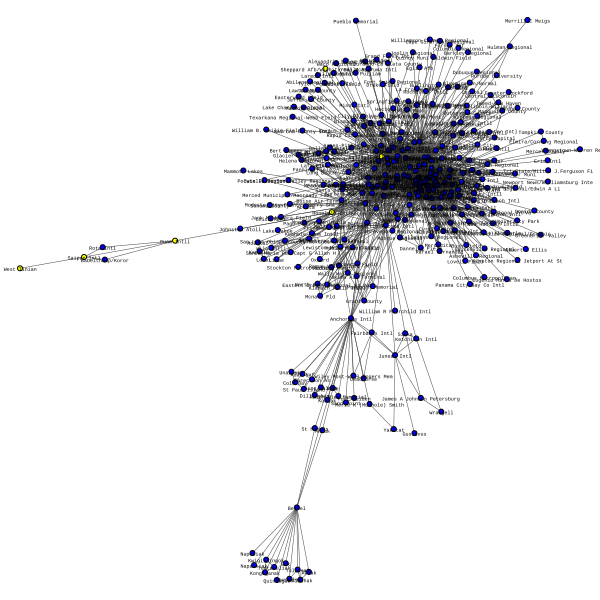

In [37]:
air.vs['color']='blue'
for i in sp: 
  air.vs[i]['color']='yellow'

visual_style["vertex_color"] = air.vs['color']

ig.plot(air, **visual_style)